# Discrimination Analysis

In [101]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [16]:
df = pd.read_csv("./data/train.csv", index_col = "observation_id")
df

,Type,Date,Part of a policing operation,Latitude,Longitude,Gender,Age range,Self-defined ethnicity,Officer-defined ethnicity,Legislation,Object of search,Outcome,Outcome linked to object of search,Removal of more than just outer clothing,station
observation_id,,,,,,,,,,,,,,,
34d76816-cfc2-4bdd-b3a2-bf0c40b12689,Person search,2019-12-01T00:00:00+00:00,True,NaN,NaN,Male,18-24,Asian/Asian British - Any other Asian background,Asian,Misuse of Drugs Act 1971 (section 23),Controlled drugs,A no further action disposal,NaN,False,devon-and-cornwall
83c87ec1-e6d4-4bbb-8e0c-159516706359,Person search,2019-12-01T00:09:00+00:00,True,NaN,NaN,Male,18-24,NaN,White,Misuse of Drugs Act 1971 (section 23),Controlled drugs,A no further action disposal,NaN,False,devon-and-cornwall
8c2eae4b-035a-492f-92d6-cd27e6c900a1,Person search,2019-12-01T00:10:00+00:00,True,NaN,NaN,Female,18-24,White - English/Welsh/Scottish/Northern Irish/...,White,Misuse of Drugs Act 1971 (section 23),Controlled drugs,A no further action disposal,NaN,False,devon-and-cornwall
e63a036a-a728-4efe-8e08-7198f56d6d0a,Person search,2019-12-01T00:10:00+00:00,False,NaN,NaN,Male,18-24,NaN,Asian,Misuse of Drugs Act 1971 (section 23),Controlled drugs,A no further action disposal,NaN,False,devon-and-cornwall
40c70aca-1f7f-4efe-8c5b-ade0f2e9937d,Person search,2019-12-01T00:12:00+00:00,True,50.368247,-4.126646,Male,18-24,NaN,White,Misuse of Drugs Act 1971 (section 23),Controlled drugs,A no further action disposal,NaN,False,devon-and-cornwall
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
a23dc59d-29fe-48e5-b012-81feb6acfddf,Person search,2018-08-29T02:45:00+00:00,NaN,NaN,NaN,Male,18-24,White - English/Welsh/Scottish/Northern Irish/...,White,Misuse of Drugs Act 1971 (section 23),Controlled drugs,A no further action disposal,NaN,NaN,wiltshire
425fde18-f7d5-4ebe-baf4-714cadd5a445,Person and Vehicle search,2018-08-29T21:00:00+00:00,False,51.540219,-1.764708,Male,18-24,White - English/Welsh/Scottish/Northern Irish/...,White,Misuse of Drugs Act 1971 (section 23),Controlled drugs,Penalty Notice for Disorder,True,False,wiltshire
7c249ab7-d4bf-47ef-86bd-aad51d7d2aab,Person search,2018-08-29T21:10:00+00:00,False,51.540219,-1.764708,Male,18-24,White - English/Welsh/Scottish/Northern Irish/...,White,Misuse of Drugs Act 1971 (section 23),Controlled drugs,A no further action disposal,NaN,False,wiltshire


# 1. Gender

## 1.1 Who was stopped

In [296]:
df.Gender.nunique(), df.Gender.unique()

(3, array(['Male', 'Female', 'Other'], dtype=object))

There is a Other Gender which will be removed from this analysis as it also contains a very small percentage of samples

In [297]:
# dropping Other value
df_gender = df[df['Gender'] != 'Other']

In [37]:
df_gender_count = df_gender.groupby("station").count()

In [38]:
Male_station_df = df_gender[df_gender["Gender"] == "Male"].groupby("station").count()

<AxesSubplot:xlabel='station'>

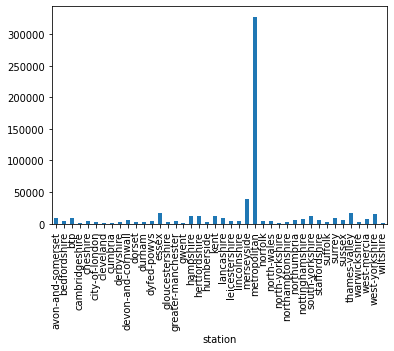

In [32]:
Male_station_df["Gender"].plot(kind="bar")

This is the quantity of Males that are stopped on each station, we probably want to turn this into a normalized value, maybe divide by the quantity of people that are stopped overall in each station

<AxesSubplot:xlabel='station'>

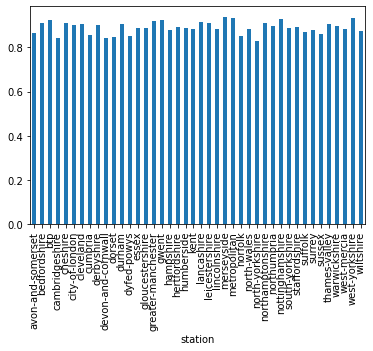

In [42]:
Male_station_df_norm = (Male_station_df["Gender"]/df_gender_count["Gender"])
Male_station_df_norm.plot(kind="bar")

For Males, normalized values seemed very close together all between 0.8 and 1

Let's check on the Females

In [131]:
Female_station_df = df_gender[df_gender["Gender"] == "Female"].groupby("station").count()

<AxesSubplot:xlabel='station'>

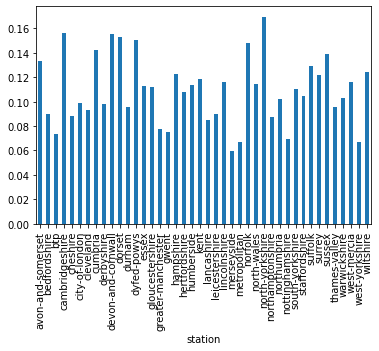

In [132]:
Female_station_df_norm = (Female_station_df["Gender"]/df_gender_count["Gender"])
Female_station_df_norm.plot(kind="bar")

There are a bit more fluctuations around the Female class

Now make a function that loops this and checks if any break this

In [275]:
def verifiy_discrimination(df, sensitive_column="Gender", max_dif=0.1):
    """
        Groups the dataframe by station, calculates the percentage for each sensitive_column and compares the values
    between stations. If any have a geater difference than max_diff then claim there is discrimination
    """
    df_station = df.copy()
    # Get a list of the sensitive classes
    sensitive_classes = df_station[sensitive_column].unique()
    
    # Group the DF by station and keep the total values
    df_total_vals = df_station.groupby("station").count()
    # print(df_total_vals)
    
    problematic_departments = []
    non_problematic_departments = []
    for sens_class in sensitive_classes:
        # print(df_station)
        # group the df and count how many occurrences in the class
        df_grouped = df_station[df_station[sensitive_column] == sens_class].groupby("station").count()
        
        # print(df_grouped)
        # normalise the values
        
        df_normed = (df_grouped[sensitive_column]/df_total_vals[sensitive_column])
        #print(df_normed)

        for station, value in df_normed.items():
            # grab the series onwards
            normed_sliced_df = df_normed.loc[station:]
            
            for station2, value2 in normed_sliced_df.items():
                subt = np.abs(value - value2)
                # print(station, station2)
                if subt > max_dif:
                    # found discrimination
                    problematic_departments.append((sens_class, subt, station, station2))
                else:
                    non_problematic_departments.append((sens_class, subt, station, station2))
        
    
    return (problematic_departments, non_problematic_departments)

In [276]:
problematic_departments, non_problematic_deparments = verifiy_discrimination(df_gender)
print(problematic_departments)

[('Male', 0.10982733946784062, 'merseyside', 'north-yorkshire'), ('Male', 0.10293748532434699, 'metropolitan', 'north-yorkshire'), ('Male', 0.10062704432250724, 'north-yorkshire', 'nottinghamshire'), ('Male', 0.10274697741726202, 'north-yorkshire', 'west-yorkshire'), ('Female', 0.10982733946784058, 'merseyside', 'north-yorkshire'), ('Female', 0.10293748532434692, 'metropolitan', 'north-yorkshire'), ('Female', 0.10062704432250726, 'north-yorkshire', 'nottinghamshire'), ('Female', 0.10274697741726202, 'north-yorkshire', 'west-yorkshire')]


Above we have the results. Which gender is being discriminated and in between what stations. The default value here is if the difference between stations is of more than 10% and we have the same 3 departments that discriminate each gender (which in retrospective makes sense, since there are only 2 classes)

## 1. 2 Analysing as time goes by

Now let's try and add time into factor here. Check if this occurs more specifically in the latest months.

Firstly, let's create some columns with date information so it can be filtered and help the analysis

In [250]:
def create_data_features(df):
    """
    Created data features for each row in the dataframe. Important for the time analysis as well as the modelling
    """
    
    df_base = df.copy()

    # beware american timestamps, where the month comes before day 
    df_base['Date'] = pd.to_datetime(df_base['Date'], format='%Y/%m/%d')

    # get the hour and day of the week, maybe they will be useful 
    df_base['hour'] = df_base['Date'].dt.hour
    df_base['month'] = df_base['Date'].dt.month
    df_base["year"] = df_base["Date"].dt.year
    df_base['day_of_week'] = df_base['Date'].dt.day_name()
    df_base["year-month"] = df_base["Date"].dt.strftime("%Y-%m")
    df_base["year-quarter"] = df["Date"].dt.year.astype(str) + 'Q' + df["Date"].dt.quarter.astype(str)
    
    return df_base

In [251]:
df_gender = create_data_features(df_gender)
df_gender.head()

,Type,Date,Part of a policing operation,Latitude,Longitude,Gender,Age range,Self-defined ethnicity,Officer-defined ethnicity,Legislation,...,Outcome linked to object of search,Removal of more than just outer clothing,station,hour,month,day_of_week,year,year-month,quarter,year-quarter
observation_id,,,,,,,,,,,,,,,,,,,,,
34d76816-cfc2-4bdd-b3a2-bf0c40b12689,Person search,2019-12-01 00:00:00+00:00,True,NaN,NaN,Male,18-24,Asian/Asian British - Any other Asian background,Asian,Misuse of Drugs Act 1971 (section 23),...,NaN,False,devon-and-cornwall,0,12,Sunday,2019,2019-12,4,2019Q4
83c87ec1-e6d4-4bbb-8e0c-159516706359,Person search,2019-12-01 00:09:00+00:00,True,NaN,NaN,Male,18-24,NaN,White,Misuse of Drugs Act 1971 (section 23),...,NaN,False,devon-and-cornwall,0,12,Sunday,2019,2019-12,4,2019Q4
8c2eae4b-035a-492f-92d6-cd27e6c900a1,Person search,2019-12-01 00:10:00+00:00,True,NaN,NaN,Female,18-24,White - English/Welsh/Scottish/Northern Irish/...,White,Misuse of Drugs Act 1971 (section 23),...,NaN,False,devon-and-cornwall,0,12,Sunday,2019,2019-12,4,2019Q4
e63a036a-a728-4efe-8e08-7198f56d6d0a,Person search,2019-12-01 00:10:00+00:00,False,NaN,NaN,Male,18-24,NaN,Asian,Misuse of Drugs Act 1971 (section 23),...,NaN,False,devon-and-cornwall,0,12,Sunday,2019,2019-12,4,2019Q4
40c70aca-1f7f-4efe-8c5b-ade0f2e9937d,Person search,2019-12-01 00:12:00+00:00,True,50.368247,-4.126646,Male,18-24,NaN,White,Misuse of Drugs Act 1971 (section 23),...,NaN,False,devon-and-cornwall,0,12,Sunday,2019,2019-12,4,2019Q4


In [183]:
df_gender_count = df_gender.groupby(["year-month", "station"]).count()
df_gender_count

Type  Date  Part of a policing operation  \
year-month station                                                       
2017-12    avon-and-somerset   315   315                             0   
           bedfordshire         93    93                             0   
           btp                 129   129                             0   
           cambridgeshire       83    83                             6   
           cheshire            150   150                             4   
...                            ...   ...                           ...   
2019-12    thames-valley       926   926                           926   
           warwickshire        126   126                           126   
           west-mercia         365   365                           365   
           west-yorkshire      974   974                           974   
           wiltshire            62    62                             0   

                              Latitude  Longitude  Gender  Age range  \
year-month station                                                     
2017-12    avon-and-somerset       247        247     315        315   
           bedfordshire              4          4      93         93   
           btp                     124        124     129        129   
           cambridgeshire           83         83      83         83   
           cheshire                134        134     150        150   
...                                ...        ...     ...        ...   
2019-12    thames-valley            72         72     926        926   
           warwickshire            122        122     126        126   
           west-mercia             245        245     365        365   
           west-yorkshire          915        915     974        974   
           wiltshire                62         62      62         62   

                              Self-defined ethnicity  \
year-month station                                     
2017-12    avon-and-somerset                     176   
           bedfordshire                           93   
           btp                                   129   
           cambridgeshire                         80   
           cheshire                              150   
...                                              ...   
2019-12    thames-valley                         826   
           warwickshire                          122   
           west-mercia                           358   
           west-yorkshire                        974   
           wiltshire                              62   

                              Officer-defined ethnicity  Legislation  \
year-month station                                                     
2017-12    avon-and-somerset                        315          312   
           bedfordshire                              93           93   
           btp                                      129          129   
           cambridgeshire                            83           83   
           cheshire                                 150          148   
...                                                 ...          ...   
2019-12    thames-valley                            926           83   
           warwickshire                             126          126   
           west-mercia                              365          365   
           west-yorkshire                           974          974   
           wiltshire                                 62           62   

                              Object of search  Outcome  \
year-month station                                        
2017-12    avon-and-somerset               315      315   
           bedfordshire                     93       93   
           btp                             129      129   
           cambridgeshire                   83       83   
           cheshire                        150      150   
...                                        ...     

In [184]:
# Filter by Gender Male
Male_year_station_df = df_gender[df_gender["Gender"] == "Male"].groupby(["year-month", "station"]).count()

In [185]:
Male_year_station_df_norm = (Male_year_station_df["Gender"]/df_gender_count["Gender"]).reset_index()

# filter by station - for a simple visualisation
Male_year_station_df_norm_ny = Male_year_station_df_norm[Male_year_station_df_norm["station"] == "north-yorkshire"]

Plot a time analysis on the evolution of the rate of stoppings for Male genders

Text(0.5, 1.0, 'Male Stopping Rate in North-Yorkshire')

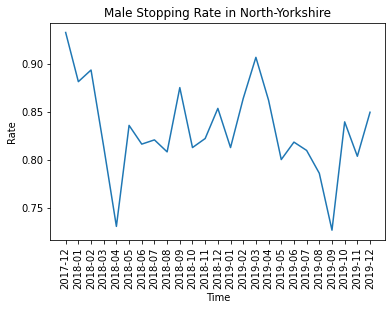

In [196]:
plt.plot(Male_year_station_df_norm_ny["year-month"], Male_year_station_df_norm_ny["Gender"])
plt.xticks(Male_year_station_df_norm_ny["year-month"], rotation='vertical')
plt.ylabel("Rate")
plt.xlabel("Time")
plt.title("Male Stopping Rate in North-Yorkshire")

Text(0.5, 1.0, 'Female Stopping Rate in North-Yorkshire')

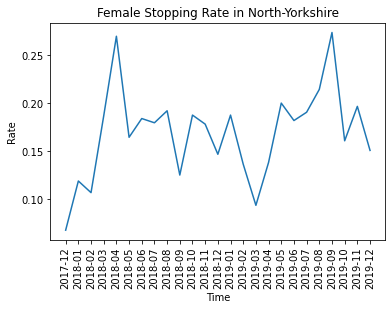

In [197]:
# For females is just 1-Males
plt.plot(Male_year_station_df_norm_ny["year-month"], 1 - Male_year_station_df_norm_ny["Gender"])
plt.xticks(Male_year_station_df_norm_ny["year-month"], rotation='vertical')
plt.ylabel("Rate")
plt.xlabel("Time")
plt.title("Female Stopping Rate in North-Yorkshire")

Out of curiosity I plotted the evolution of the stopping rate, for males and females, in North-Yorkshire. This can be done for every station but since we have 42 stations it's not possible (or useful) to visualise the evolution for all stations at the same time - we want to compare rates between stations and not inside the same station. However this is an interesting visualisation

### Now I will compare, between all "year-month" groups, the rates between stations and if some rates differ more than max_dif, then it will be considered discrimination

In [279]:
def verifiy_discrimination_time(df, date_column ="year-month", sensitive_column="Gender", max_dif=0.10):
    df_copy = df.copy()
    
    # Get the time span of the dataframe
    year_months = df_copy[date_column].unique()
    
    df_grouped = df_copy.groupby([date_column, "station"]).count()
    df_grouped.reset_index(inplace = True)
    
    problematic_departments = []
    # non_problematic_departments = []
    for year_month_pair in year_months:
        # iterate through every month
        df_station_sliced = df_copy[df_copy[date_column] == year_month_pair]

        # check for discrimination in that month
        problematic_departments_monthly, non_problematic_deparments_monthly = verifiy_discrimination(df_station_sliced, sensitive_column, max_dif)
        if len(problematic_departments_monthly) > 0:
            # there are problematic departments
            problematic_departments.append((year_month_pair, problematic_departments_monthly))
    
    return problematic_departments



In [278]:
problematic_departments = verifiy_discrimination_time(df_gender)

In [280]:
problematic_departments

[('2019-12',
  [('Male', 0.1298405466970387, 'avon-and-somerset', 'cambridgeshire'),
   ('Male', 0.11392405063291144, 'bedfordshire', 'cambridgeshire'),
   ('Male', 0.14341085271317833, 'cambridgeshire', 'cheshire'),
   ('Male', 0.13725490196078427, 'cambridgeshire', 'cleveland'),
   ('Male', 0.11864406779661019, 'cambridgeshire', 'devon-and-cornwall'),
   ('Male', 0.13559322033898302, 'cambridgeshire', 'dorset'),
   ('Male', 0.1145374449339207, 'cambridgeshire', 'dyfed-powys'),
   ('Male', 0.11040000000000005, 'cambridgeshire', 'essex'),
   ('Male', 0.10681818181818181, 'cambridgeshire', 'hampshire'),
   ('Male', 0.11839708561020035, 'cambridgeshire', 'hertfordshire'),
   ('Male', 0.13564668769716093, 'cambridgeshire', 'kent'),
   ('Male', 0.16504854368932043, 'cambridgeshire', 'leicestershire'),
   ('Male', 0.1439114391143912, 'cambridgeshire', 'norfolk'),
   ('Male', 0.15068493150684936, 'cambridgeshire', 'north-yorkshire'),
   ('Male', 0.10769230769230764, 'cambridgeshire', 'northa

The output above shows for every month and gender between what stations there has been a difference in relative searches of 10%


### Conclusions

We can see that in the later months of the dataset, in December of 2019, the station **cambridgeshire** is considered to discriminate between 22 stations in Males. There are a lot of values every month. Maybe checking this monthy is too extreme? Let's try quarterly since some trainings and reviews are done quarterly it might be a good time window

### Quarterly

In [281]:
problematic_departments = verifiy_discrimination_time(df_gender, "year-quarter")
problematic_departments

[('2019Q4',
  [('Male', 0.11167325428194985, 'btp', 'cambridgeshire'),
   ('Male', 0.10356399265156147, 'btp', 'dorset'),
   ('Male', 0.10204050292734423, 'btp', 'north-yorkshire'),
   ('Male', 0.10284328642069218, 'cambridgeshire', 'lancashire'),
   ('Male', 0.11816289965390214, 'cambridgeshire', 'merseyside'),
   ('Male', 0.1103420811195015, 'cambridgeshire', 'metropolitan'),
   ('Male', 0.11023308320605618, 'cambridgeshire', 'nottinghamshire'),
   ('Male', 0.11988011988011982, 'cambridgeshire', 'west-yorkshire'),
   ('Male', 0.10447852065262175, 'devon-and-cornwall', 'merseyside'),
   ('Male', 0.10619574087883943, 'devon-and-cornwall', 'west-yorkshire'),
   ('Male', 0.11005363802351376, 'dorset', 'merseyside'),
   ('Male', 0.10223281948911311, 'dorset', 'metropolitan'),
   ('Male', 0.1021238215756678, 'dorset', 'nottinghamshire'),
   ('Male', 0.11177085824973143, 'dorset', 'west-yorkshire'),
   ('Male', 0.10340079260207546, 'merseyside', 'norfolk'),
   ('Male', 0.10853014829929652, 

Above, again, we can see the output of the quarter, gender and the group of stations that infriged the maximum difference allowed of stops.

### Conclusions
If we only consider alarming when a station has a high value when compared with 5 or more stations:
- We can see that in the later quarter, Q4 of 2019, the stations that standout the most are **cambridgeshire, north-yorkshire, merseyside and dorset** for both genders.
- In Q3 of 2019, we only have **north-yorkshire**
- In Q2 of 2019, we have **cleveland, north-yorkshire**
- In Q1 of 2019, we have **sussex, cleveland**

So concluding for the year of 2019, the most alarming discriminating stations began with cleveland and sussex, but later on both stations corrected the behaviour. However, **north-yorkshire** started until the end of the year. Being, by far, the most alarming station to show discrimination regarding **Gender**. In the last quarter, cambridgeshire, merseyside and dorset also presented some signs of discrimination but maybe it will be corrected in the next month

## 1.2 Clothes Removal

Clothes removal is not valid for a vehicle search, remove that type and the other NaNs may be filled with False

In [298]:
df_gender_cloth = df_gender.loc[~(df_gender["Type"] == "Vehicle search")]

In [302]:
df_gender_cloth["Removal of more than just outer clothing"].isna().sum()

425473

In [305]:
df_gender_cloth["Removal of more than just outer clothing"] = df_gender_cloth["Removal of more than just outer clothing"].fillna(False)

<ipython-input-305-eaa884a581d0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_gender_cloth["Removal of more than just outer clothing"] = df_gender_cloth["Removal of more than just outer clothing"].fillna(False)


In [306]:
df_gender_cloth

,Type,Date,Part of a policing operation,Latitude,Longitude,Gender,Age range,Self-defined ethnicity,Officer-defined ethnicity,Legislation,Object of search,Outcome,Outcome linked to object of search,Removal of more than just outer clothing,station
observation_id,,,,,,,,,,,,,,,
34d76816-cfc2-4bdd-b3a2-bf0c40b12689,Person search,2019-12-01T00:00:00+00:00,True,NaN,NaN,Male,18-24,Asian/Asian British - Any other Asian background,Asian,Misuse of Drugs Act 1971 (section 23),Controlled drugs,A no further action disposal,NaN,False,devon-and-cornwall
83c87ec1-e6d4-4bbb-8e0c-159516706359,Person search,2019-12-01T00:09:00+00:00,True,NaN,NaN,Male,18-24,NaN,White,Misuse of Drugs Act 1971 (section 23),Controlled drugs,A no further action disposal,NaN,False,devon-and-cornwall
8c2eae4b-035a-492f-92d6-cd27e6c900a1,Person search,2019-12-01T00:10:00+00:00,True,NaN,NaN,Female,18-24,White - English/Welsh/Scottish/Northern Irish/...,White,Misuse of Drugs Act 1971 (section 23),Controlled drugs,A no further action disposal,NaN,False,devon-and-cornwall
e63a036a-a728-4efe-8e08-7198f56d6d0a,Person search,2019-12-01T00:10:00+00:00,False,NaN,NaN,Male,18-24,NaN,Asian,Misuse of Drugs Act 1971 (section 23),Controlled drugs,A no further action disposal,NaN,False,devon-and-cornwall
40c70aca-1f7f-4efe-8c5b-ade0f2e9937d,Person search,2019-12-01T00:12:00+00:00,True,50.368247,-4.126646,Male,18-24,NaN,White,Misuse of Drugs Act 1971 (section 23),Controlled drugs,A no further action disposal,NaN,False,devon-and-cornwall
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
a23dc59d-29fe-48e5-b012-81feb6acfddf,Person search,2018-08-29T02:45:00+00:00,NaN,NaN,NaN,Male,18-24,White - English/Welsh/Scottish/Northern Irish/...,White,Misuse of Drugs Act 1971 (section 23),Controlled drugs,A no further action disposal,NaN,False,wiltshire
425fde18-f7d5-4ebe-baf4-714cadd5a445,Person and Vehicle search,2018-08-29T21:00:00+00:00,False,51.540219,-1.764708,Male,18-24,White - English/Welsh/Scottish/Northern Irish/...,White,Misuse of Drugs Act 1971 (section 23),Controlled drugs,Penalty Notice for Disorder,True,False,wiltshire
7c249ab7-d4bf-47ef-86bd-aad51d7d2aab,Person search,2018-08-29T21:10:00+00:00,False,51.540219,-1.764708,Male,18-24,White - English/Welsh/Scottish/Northern Irish/...,White,Misuse of Drugs Act 1971 (section 23),Controlled drugs,A no further action disposal,NaN,False,wiltshire


In [307]:
df_gender_cloth["Removal of more than just outer clothing"].isna().sum()

0